In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [4]:
df = pd.read_csv("UniversalBank.csv")

In [5]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
#Checking for missing values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
#Splitting the data
X = df.drop(columns=['ID','ZIP Code','Personal Loan'],axis=1)
y = df['Personal Loan']

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape)

(4000, 11) (1000, 11)


In [9]:
s = StandardScaler()
X_train_scaled = s.fit_transform(X_train)
X_test_scaled = s.transform(X_test)

In [15]:
#Train the model
kernels = ['linear','rbf','poly']
results = {}
for kernel in kernels:
    model = SVC(kernel=kernel,C=1,random_state=42)
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test,y_pred)
    results[kernel] = acc

    print("Accuracy for ",kernel," is: ",acc)
    print(classification_report(y_test,y_pred,target_names=['No Loan (0)','Loan (1)']))
    print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

Accuracy for  linear  is:  0.953
              precision    recall  f1-score   support

 No Loan (0)       0.96      0.99      0.97       895
    Loan (1)       0.91      0.61      0.73       105

    accuracy                           0.95      1000
   macro avg       0.94      0.80      0.85      1000
weighted avg       0.95      0.95      0.95      1000

Confusion Matrix:
 [[889   6]
 [ 41  64]]
Accuracy for  rbf  is:  0.976
              precision    recall  f1-score   support

 No Loan (0)       0.98      1.00      0.99       895
    Loan (1)       0.98      0.79      0.87       105

    accuracy                           0.98      1000
   macro avg       0.98      0.89      0.93      1000
weighted avg       0.98      0.98      0.97      1000

Confusion Matrix:
 [[893   2]
 [ 22  83]]
Accuracy for  poly  is:  0.968
              precision    recall  f1-score   support

 No Loan (0)       0.97      1.00      0.98       895
    Loan (1)       0.95      0.73      0.83       105

    

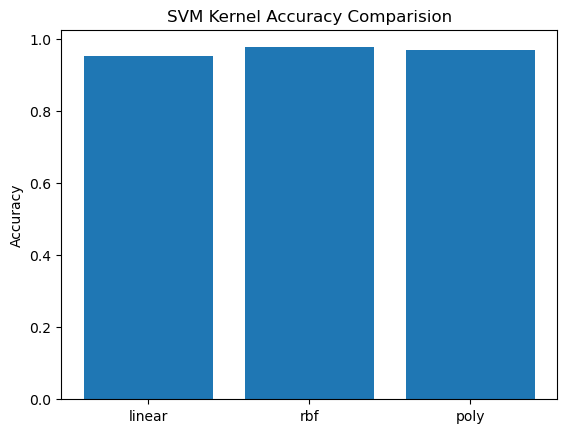

<Figure size 640x480 with 0 Axes>

In [13]:
#Accuracy Comparision
plt.bar(results.keys(),results.values())
plt.title("SVM Kernel Accuracy Comparision")
plt.ylabel('Accuracy')
plt.show()
plt.savefig("svm_acc_2.png")